In [1]:
import pandas as pd,numpy as np
df=pd.read_excel('Absenteeism_at_work_Project.xls')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [2]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [70]:
# Convert the categorical columns to object 
cat_cols=["ID", "Reason for absence", "Month of absence",
          "Day of the week", "Seasons","Disciplinary failure",
          "Son",
          "Pet",
          "Education","Social drinker","Social smoker"]
for i in cat_cols:
    df[i] = df[i].astype(object)
num_cols=["Transportation expense","Distance from Residence to Work", "Service time","Age",
          "Work load Average/day ","Hit target", "Weight","Height",
          "Body mass index","Absenteeism time in hours" ]
for i in num_cols:
    df[i] = df[i].astype(np.float64)
# viewing the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null object
Reason for absence                 740 non-null object
Month of absence                   740 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null object
Education                          740 non-null object
Son                                740 non-null object
Social drinker                     740 non-null object
Social smoker                      740 non-null object
Pet      

In [4]:
#import fancyimpute
import statistics as stat
def impute_missing_vals(df,num_cols,cat_cols):
    df_full=pd.DataFrame(columns=df.columns)
    for j in np.unique(df.ID):
        df_n=df[df.ID==j].reset_index(drop=True)
        missing_val = df_n.isnull().sum()
        r,c=df_n.shape
#         if r>2:
#             if df_n[num_cols].isnull().sum().sum()>0:
#                 df_n[num_cols]=pd.DataFrame(fancyimpute.KNN(k = 5).complete(df_n[num_cols]), columns = num_cols)
        for i in num_cols:
            if len(df_n[df_n[i].isnull()])>0:
                df_n.loc[df_n[i].isnull(),i]=np.mean(df_n[i])
        for i in cat_cols:
            if len(df_n[df_n[i].isnull()])>0:
                if len(stat._counts(df_n.loc[:,i]))>1:
                    df_n.loc[:,i]=df_n.loc[:,i].fillna(method='ffill')
                    df_n[i] = df_n[i].astype(object)
                else:
                    df_n.loc[df_n[i].isnull(),i]=stat.mode(df_n[i])
        df_full=pd.concat([df_full,df_n],ignore_index=True)
    return df_full
df=impute_missing_vals(df,num_cols,cat_cols)

In [5]:
df.describe(include='all')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.0,740.0,740.0,740.0,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.0,740.0,740.0,740.0,740.0,740.0,740.000000,740.000000,740.000000,740.000000
unique,36.0,28.0,13.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,5.0,2.0,2.0,6.0,NaN,NaN,NaN,NaN
top,3.0,23.0,3.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
freq,113.0,149.0,87.0,161.0,195.0,NaN,NaN,NaN,NaN,NaN,...,701.0,611.0,298.0,420.0,686.0,460.0,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,221.329730,29.631081,12.554054,36.450000,271198.854775,...,NaN,NaN,NaN,NaN,NaN,NaN,79.035135,172.114865,26.677027,6.981617
std,NaN,NaN,NaN,NaN,NaN,66.952223,14.836788,4.384873,6.478772,38746.603835,...,NaN,NaN,NaN,NaN,NaN,NaN,12.883211,6.034995,4.285452,13.281750
min,NaN,NaN,NaN,NaN,NaN,118.000000,5.000000,1.000000,27.000000,205917.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,163.000000,19.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,179.000000,16.000000,9.000000,31.000000,244387.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,169.000000,24.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,225.000000,26.000000,13.000000,37.000000,264249.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,83.000000,170.000000,25.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,260.000000,50.000000,16.000000,40.000000,284853.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,89.000000,172.000000,31.000000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null object
Reason for absence                 740 non-null object
Month of absence                   740 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null object
Education                          740 non-null object
Son                                740 non-null object
Social drinker                     740 non-null object
Social smoker                      740 non-null object
Pet      

## Visualizing the data

In [7]:
% matplotlib inline
import matplotlib.pyplot as plt

### Numerical Variables

Text(0.5,1,'BoxPlot')

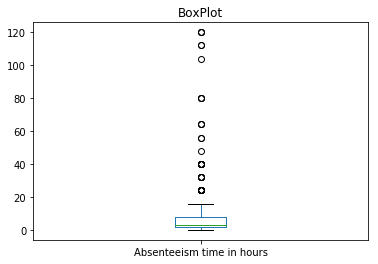

In [8]:
df['Absenteeism time in hours'].plot.box()
plt.title('BoxPlot')

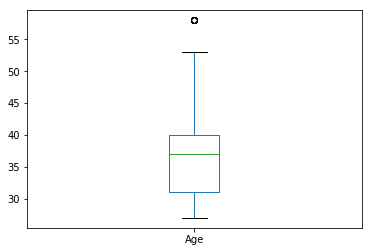

In [9]:
df.Age.plot.box()

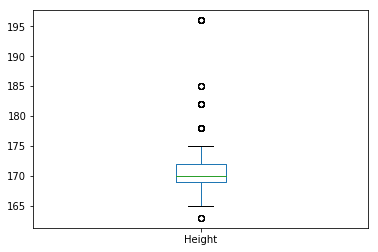

In [10]:
df.Height.plot.box()

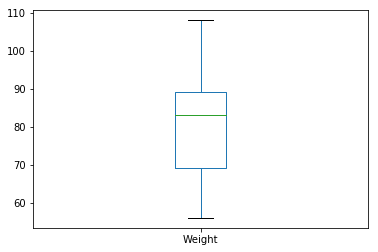

In [11]:
df.Weight.plot.box()

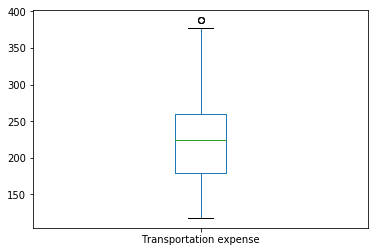

In [12]:
df['Transportation expense'].plot.box()

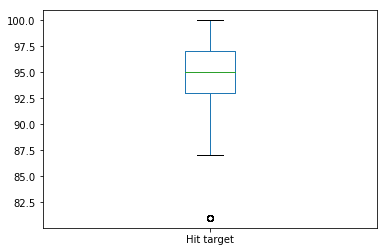

In [13]:
df['Hit target'].plot.box()

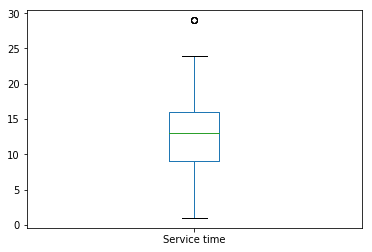

In [14]:
df['Service time'].plot.box()

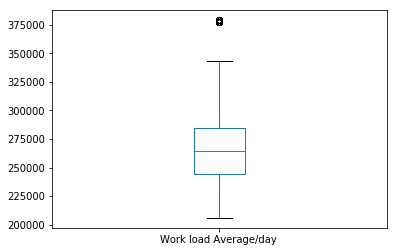

In [15]:
df['Work load Average/day '].plot.box()

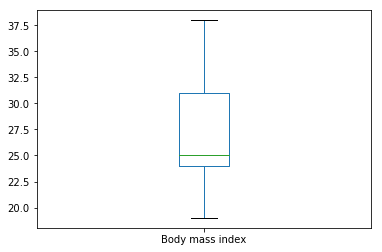

In [16]:
df['Body mass index'].plot.box()

### Categorical Variables 

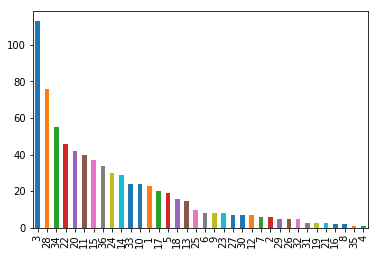

In [17]:
df.ID.value_counts().plot(kind='bar')

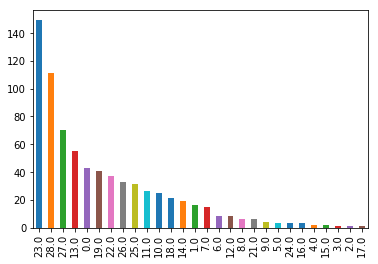

In [18]:
df['Reason for absence'].value_counts().plot(kind='bar')

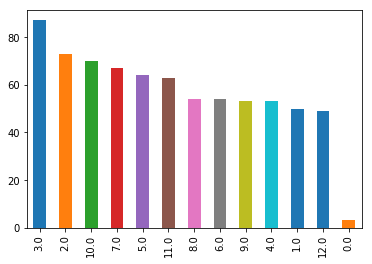

In [19]:
df['Month of absence'].value_counts().plot(kind='bar')

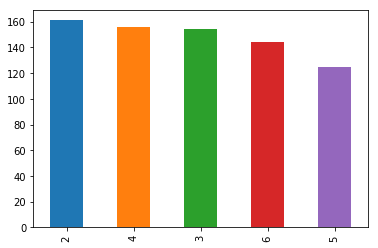

In [20]:
df['Day of the week'].value_counts().plot(kind='bar')

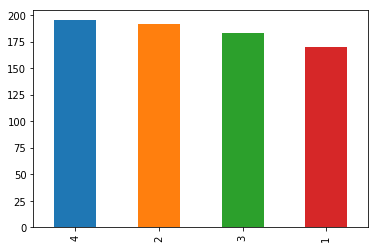

In [21]:
df['Seasons'].value_counts().plot(kind='bar')

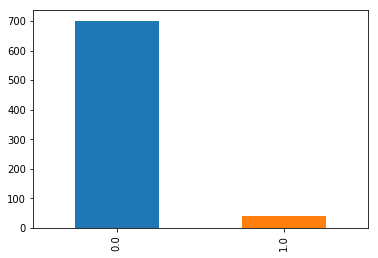

In [22]:
df['Disciplinary failure'].value_counts().plot(kind='bar')

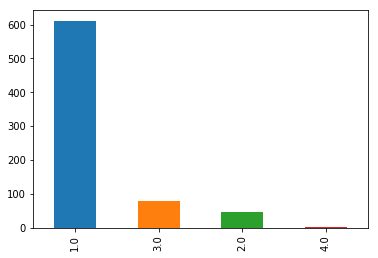

In [23]:
df['Education'].value_counts().plot(kind='bar')

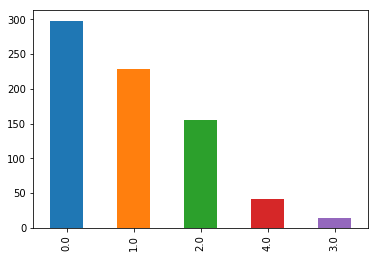

In [24]:
df['Son'].value_counts().plot(kind='bar')

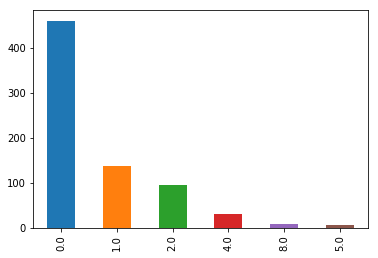

In [25]:
df['Pet'].value_counts().plot(kind='bar')

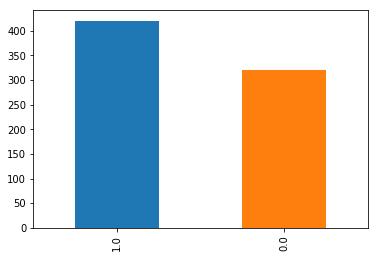

In [26]:
df['Social drinker'].value_counts().plot(kind='bar')

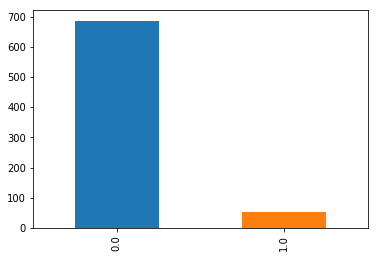

In [27]:
df['Social smoker'].value_counts().plot(kind='bar')

## Outlier Analysis

In [28]:
def outlier_imputer(df_o,num_cols):
    # Outlier Analysis
    while True:
        for i in num_cols:
            median=np.median(df_o[i])
            std=np.std(df_o[i])
            min=(df_o[i].quantile(0.25)-1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))    
            max=(df_o[i].quantile(0.75)+1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))
            df_o.loc[df_o[i]<min,i] = np.nan
            df_o.loc[df_o[i]>max,i] = np.nan
        missing_val = df_o.isnull().sum()
        print(missing_val)
        if(missing_val.sum()>0):
#             df_o[num_cols]=pd.DataFrame(fancyimpute.KNN(k = 3).complete(df_o[num_cols]), columns = num_cols)
            for i in num_cols:
                if len(df_o[df_o[i].isnull()])>0:
                    df_o.loc[df_o[i].isnull(),i]=np.mean(df_o[i])
        else:
            break
    df_o.loc[df_o['Reason for absence']==0,'Reason for absence']=20
    df_o.loc[df_o['Month of absence']==0,'Month of absence']=stat.mode(df_o['Month of absence'])
    return df_o
df=outlier_imputer(df,["Service time","Absenteeism time in hours"])

ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        5
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          43
dtype: int64
ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Tran

## Exploring Behavior between categorical and target variables with Seaborn

Text(0.5,1,'Absenteeism vs Seasons')

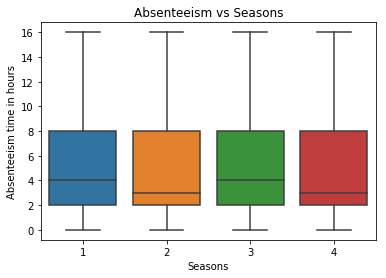

In [29]:
import seaborn as sns
sns.boxplot(x=df.Seasons,y=df['Absenteeism time in hours']).set_title('Absenteeism vs Seasons')


Text(0.5,1,'Absenteeism vs Day of the week')

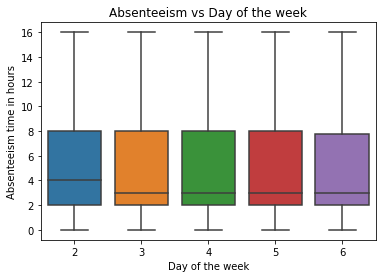

In [30]:
sns.boxplot(x=df['Day of the week'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Day of the week')

Text(0.5,1,'Absenteeism vs Social drinker')

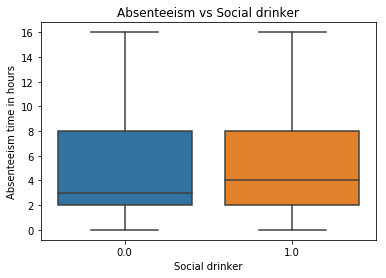

In [31]:
sns.boxplot(x=df['Social drinker'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Social drinker')

Text(0.5,1,'Absenteeism vs Social smoker')

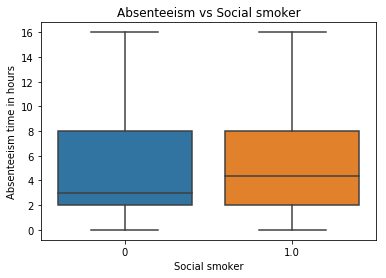

In [32]:
sns.boxplot(x=df['Social smoker'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Social smoker')

Text(0.5,1,'Absenteeism vs ID')

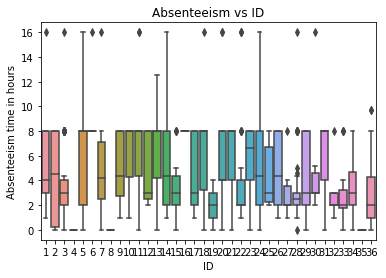

In [33]:
sns.boxplot(x=df.ID,y=df['Absenteeism time in hours']).set_title('Absenteeism vs ID')

Text(0.5,1,'Absenteeism vs Reason for absence')

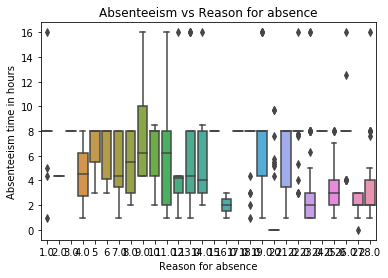

In [34]:
sns.boxplot(x=df['Reason for absence'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Reason for absence')

Text(0.5,1,'Absenteeism vs Month of absence')

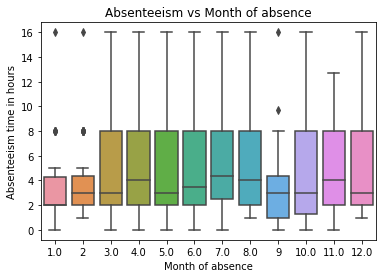

In [35]:
sns.boxplot(x=df['Month of absence'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Month of absence')

Text(0.5,1,'Absenteeism vs Disciplinary failure')

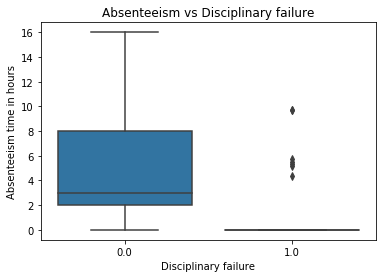

In [36]:
sns.boxplot(x=df['Disciplinary failure'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Disciplinary failure')

Text(0.5,1,'Absenteeism vs Education')

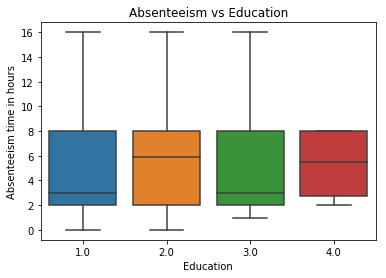

In [37]:
sns.boxplot(x=df.Education,y=df['Absenteeism time in hours']).set_title('Absenteeism vs Education')

Text(0.5,1,'Absenteeism vs Son')

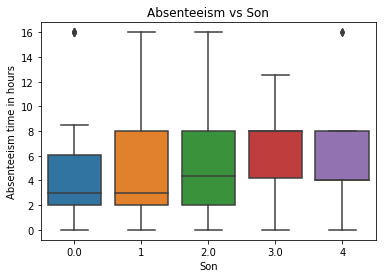

In [38]:
sns.boxplot(x=df.Son,y=df['Absenteeism time in hours']).set_title('Absenteeism vs Son')

Text(0.5,1,'Absenteeism vs Pet')

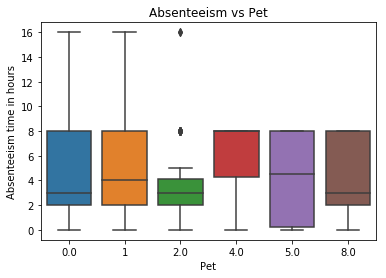

In [39]:
sns.boxplot(x=df.Pet,y=df['Absenteeism time in hours']).set_title('Absenteeism vs Pet')

### Findings for categorical variables
The variables like Social smoker, Social drinker, Day of week, and Seasons have a steady median for Absenteeism hours thus they do not affect the absenteeism much. Other variables have some effect on the absenteeism time.

## Exploring Numerical variables w.r.t. Target using Scatter Plot

Text(0.5,1,'Absenteeism vs Transportation Expense')

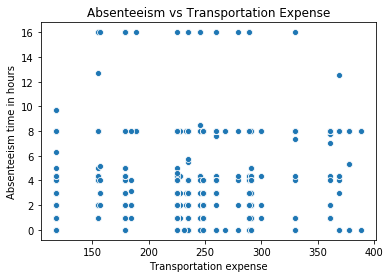

In [49]:
sns.scatterplot(x=df['Transportation expense'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Transportation Expense')

Text(0.5,1,'Absenteeism vs Distance from Residence to Work')

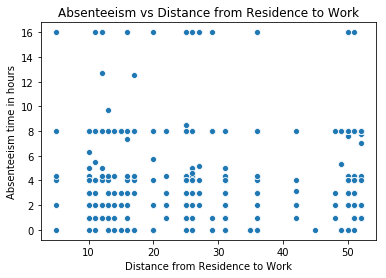

In [76]:
sns.scatterplot(x='Distance from Residence to Work',y='Absenteeism time in hours',data=df).set_title('Absenteeism vs Distance from Residence to Work')

Text(0.5,1,'Absenteeism vs Work load Average/day ')

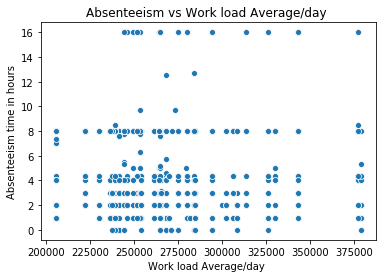

In [51]:
sns.scatterplot(x=df['Work load Average/day '],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Work load Average/day ')

Text(0.5,1,'Absenteeism vs Age')

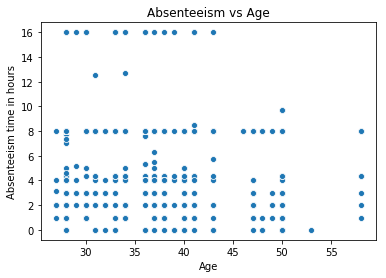

In [52]:
sns.scatterplot(x=df['Age'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Age')

Text(0.5,1,'Absenteeism vs Service time')

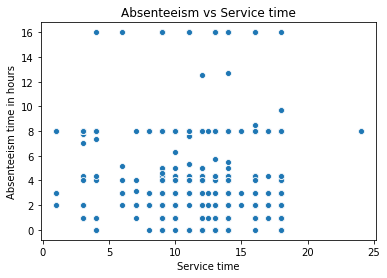

In [75]:
sns.scatterplot(x='Service time',y='Absenteeism time in hours',data=df).set_title('Absenteeism vs Service time')

Text(0.5,1,'Absenteeism vs Weight')

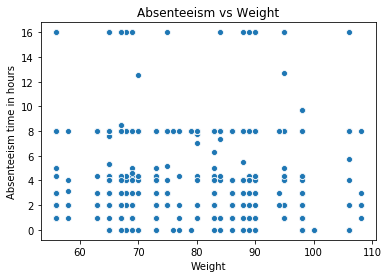

In [54]:
sns.scatterplot(x=df['Weight'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Weight')

Text(0.5,1,'Absenteeism vs Height')

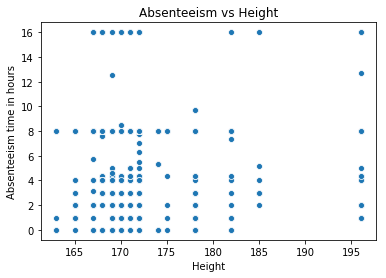

In [55]:
sns.scatterplot(x=df['Height'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Height')

Text(0.5,1,'Absenteeism vs Body mass index')

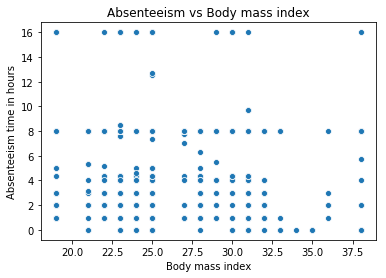

In [56]:
sns.scatterplot(x=df['Body mass index'],y=df['Absenteeism time in hours']).set_title('Absenteeism vs Body mass index')

In [57]:
df_n=df[df.ID==5]

In [58]:
np.mean(df_n['Absenteeism time in hours'])

5.777777777777778

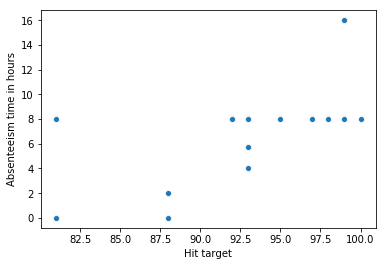

In [59]:
sns.scatterplot(x=df_n['Hit target'],y=df_n['Absenteeism time in hours'])

## Feature Selection

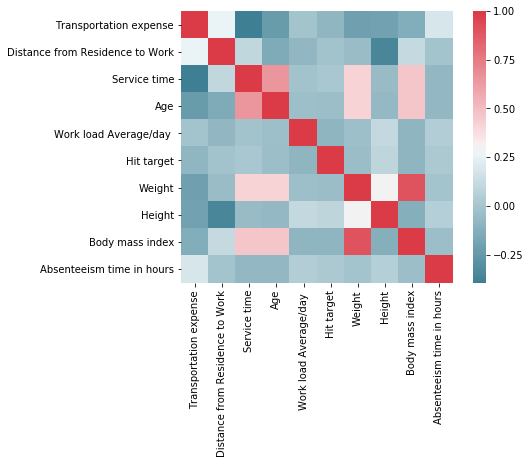

In [114]:
def feature_selection(df,num_cols):
    #Set the width and hieght of the plot
    f, ax = plt.subplots(figsize=(7, 5))
    #Generate correlation matrix
    corr = df[num_cols].corr()
    #Plot using seaborn library
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    df.drop(columns=['Age','Body mass index','Social smoker', 'Social drinker', 'Day of the week', 'Seasons'],axis=1,inplace=True)
    return df
df=feature_selection(df,num_cols)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 15 columns):
ID                                 740 non-null object
Reason for absence                 740 non-null object
Month of absence                   740 non-null object
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null float64
Education                          740 non-null object
Son                                740 non-null float64
Pet                                740 non-null float64
Weight                             740 non-null float64
Height                             740 non-null float64
Absenteeism time in hours          740 non-null float64
dtypes: float64(11), object(4)
memory usage: 86.8+ KB


In [117]:
# converting discrete numerical features to float
df[['Son','Pet','Disciplinary failure']]=df[['Son','Pet','Disciplinary failure']].astype(np.float64)

In [119]:
# get the dummy variables
df=pd.get_dummies(data=df,drop_first=True)

In [121]:
df=df.astype(np.float64)

In [122]:
ab=df['Absenteeism time in hours']

In [123]:
df.drop(columns='Absenteeism time in hours',axis=1,inplace=True)
df['Absenteeism time in hours']=ab
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 87 columns):
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null float64
Son                                740 non-null float64
Pet                                740 non-null float64
Weight                             740 non-null float64
Height                             740 non-null float64
ID_2                               740 non-null float64
ID_3                               740 non-null float64
ID_4                               740 non-null float64
ID_5                               740 non-null float64
ID_6                               740 non-null float64
ID_7                               740 non-null float64

In [125]:
# performing train test split
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-86].values
y=df.iloc[:,86].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [126]:
# feature scaling
from sklearn.preprocessing import StandardScaler
def feature_scaling(X_train,X_test):
    standardScaler=StandardScaler()
    X_train=standardScaler.fit_transform(X_train)
    X_test=standardScaler.transform(X_test)
    return X_train,X_test,standardScaler
X_train_scaled,X_test_scaled,standardScaler=feature_scaling(X_train,X_test)

In [127]:
# train linear model
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
print('Linear Model Accuracy ',lr_model.score(X_test,y_test))
preds=lr_model.predict(X_test)

Linear Model Accuracy  0.006175299523329958


In [151]:
import statsmodels.formula.api as sm


In [152]:
reg=sm.OLS(endog=y_train,exog=X_train_scaled).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.878
Date:                Mon, 03 Dec 2018   Prob (F-statistic):            0.00301
Time:                        14:31:57   Log-Likelihood:                -1838.0
No. Observations:                 592   AIC:                             3678.
Df Residuals:                     591   BIC:                             3682.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6614      0.222      2.980      0.003       0.225       1.097
==============================================================================
Omnibus:                      119.664   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.812
Skew:                           1.146   Prob(JB):                     1.25e-50
Kurtosis:                       5.016   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
def backwardElimination(x,y, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        print(maxVar)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [155]:
backwardElimination(X_train_scaled,y_train,0.05)

0.0030054239934260317


array([[ 0.58130564],
       [-1.53505976],
       [-0.62591688],
       [ 0.40245786],
       [-1.53505976],
       [ 0.05966628],
       [ 2.08660778],
       [-0.98361244],
       [ 1.0135211 ],
       [ 0.17889813],
       [-0.47687706],
       [ 0.37264989],
       [ 1.0135211 ],
       [-1.53505976],
       [ 1.04332907],
       [ 0.10437822],
       [-0.62591688],
       [ 0.20870609],
       [ 0.58130564],
       [ 1.1774649 ],
       [ 1.0135211 ],
       [-1.53505976],
       [-0.55139697],
       [ 0.05966628],
       [-0.98361244],
       [-1.53505976],
       [-0.62591688],
       [ 0.14909017],
       [ 0.20870609],
       [ 1.0135211 ],
       [ 0.37264989],
       [ 0.05966628],
       [-0.62591688],
       [-0.62591688],
       [-0.62591688],
       [-0.95380447],
       [ 0.05966628],
       [ 0.20870609],
       [ 1.0135211 ],
       [ 0.58130564],
       [ 0.10437822],
       [-1.53505976],
       [ 0.40245786],
       [-0.62591688],
       [-0.62591688],
       [-0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null object
Reason for absence                 737 non-null object
Month of absence                   739 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null object
Education                          730 non-null object
Son                                734 non-null float64
Social drinker                     737 non-null object
Social smoker                      736 non-null object
Pet     

C:\Users\ytnvj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\ytnvj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ytnvj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ytnvj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Absenteeism time in hours,Distance from Residence to Work,Hit target,Service time,Transportation expense,Work load Average/day,Time Utilization
0,4.543092,36.327497,95.131901,13.834657,216.703475,259588.796317,0.671615
1,5.054416,28.951090,92.917695,12.639582,236.692554,266490.958065,0.600112
2,4.221792,25.517478,93.532558,11.259675,237.395183,257370.102048,0.625052
3,3.835172,30.796454,94.755736,12.466994,215.712937,261371.242719,0.692374
4,4.560182,32.372108,94.029214,13.171053,220.031039,269620.527670,0.653772
5,4.646330,28.489238,93.543600,12.141467,235.552433,263311.685959,0.617317
6,4.097347,28.366403,94.302430,11.956768,227.322276,259121.540203,0.657320
7,4.215105,31.077416,94.436150,12.743118,218.198903,265199.065919,0.669225
8,4.583511,30.364063,93.857394,12.629302,227.051337,266123.556982,0.637073
9,4.387557,28.665522,93.937076,12.104665,230.980374,261286.220728,0.637532


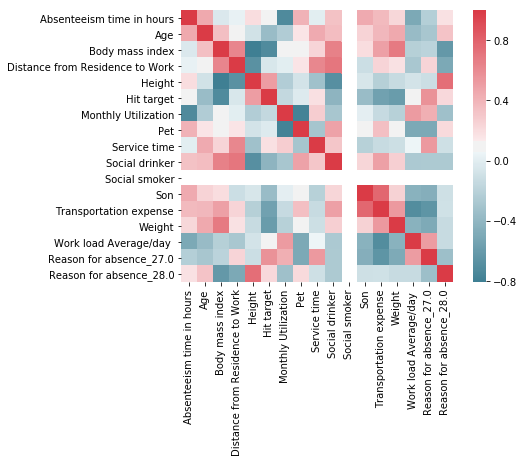

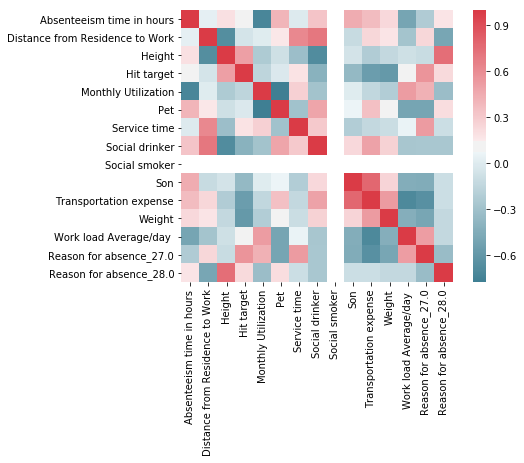

In [2]:
import os
import pandas as pd
import numpy as np
import statistics as stat
import fancyimpute
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def load_data():
    # import the dataset
    df=pd.read_excel('Absenteeism_at_work_Project.xls')
    # Convert the categorical columns to object 
    cat_cols=["ID", "Reason for absence", "Month of absence",
              "Day of the week", "Seasons","Disciplinary failure",
              "Education","Social drinker","Social smoker"]
    for i in cat_cols:
        df[i] = df[i].astype(object)
    num_cols=["Transportation expense","Distance from Residence to Work", "Service time","Age",
              "Work load Average/day ","Hit target","Son",
              "Pet", "Weight","Height",
              "Body mass index","Absenteeism time in hours" ]
    for i in num_cols:
        df[i] = df[i].astype(np.float64)
    # viewing the dataframe's info
    df.info()
    return df,num_cols,cat_cols
def impute_missing_vals(df,num_cols,cat_cols):
    df_full=pd.DataFrame(columns=df.columns)
    for j in np.unique(df.ID):
        df_n=df[df.ID==j].reset_index(drop=True)
        missing_val = df_n.isnull().sum()
        r,c=df_n.shape
        if r>2:
            if df_n[num_cols].isnull().sum().sum()>0:
                df_n[num_cols]=pd.DataFrame(fancyimpute.KNN(k = 5).complete(df_n[num_cols]), columns = num_cols)
#         for i in num_cols:
#             if len(df_n[df_n[i].isnull()])>0:
#                 df_n.loc[df_n[i].isnull(),i]=np.mean(df_n[i])
        for i in cat_cols:
            if len(df_n[df_n[i].isnull()])>0:
                if len(stat._counts(df_n.loc[:,i]))>1:
                    df_n.loc[:,i]=df_n.loc[:,i].fillna(method='ffill')
                    df_n[i] = df_n[i].astype(object)
                else:
                    df_n.loc[df_n[i].isnull(),i]=stat.mode(df_n[i])
        df_full=pd.concat([df_full,df_n],ignore_index=True)
    return df_full
def outlier_imputer(df_o,num_cols):
    # Outlier Analysis
    while True:
        for i in num_cols:
            median=np.median(df_o[i])
            std=np.std(df_o[i])
            min=(df_o[i].quantile(0.25)-1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))    
            max=(df_o[i].quantile(0.75)+1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))
            df_o.loc[df_o[i]<min,i] = np.nan
            df_o.loc[df_o[i]>max,i] = np.nan
        missing_val = df_o.isnull().sum()
        print(missing_val)
        if(missing_val.sum()>0):
            df_o[num_cols]=pd.DataFrame(fancyimpute.KNN(k = 3).complete(df_o[num_cols]), columns = num_cols)
#             for i in num_cols:
#                 if len(df_o[df_o[i].isnull()])>0:
#                     df_o.loc[df_o[i].isnull(),i]=np.mean(df_o[i])
        else:
            break
    df_o.loc[df_o['Reason for absence']==0,'Reason for absence']=20
    df_o.loc[df_o['Month of absence']==0,'Month of absence']=stat.mode(df_o['Month of absence'])
    return df_o
def add_features(df):
    # Feature Engineering
    df['Time Utilization']=(df['Service time'] - df['Absenteeism time in hours'])/df['Service time']
    for i in df['Month of absence'].unique():
        monthly_utilization=df[df['Month of absence']==i].iloc[:,21].sum()/len(df[df['Month of absence']==i])
        print(monthly_utilization)
        if ('Monthly Utilization' in df.columns):
            df.loc[df['Month of absence']==i,'Monthly Utilization']=monthly_utilization
        else:
            df['Monthly Utilization']=np.where(df['Month of absence']==i,monthly_utilization,np.nan)
    return df
def convert_to_timeseries(df):
    ts_df=pd.DataFrame(columns=df.columns)
    cat_cols=['Day of the week', 'Disciplinary failure', 'Education','Reason for absence', 'Seasons', 'Social drinker','Social smoker']
    num_cols=["Transportation expense","Distance from Residence to Work", "Service time","Age",'Monthly Utilization',
                  "Work load Average/day ","Hit target","Son",
                  "Pet", "Weight","Height",
                  "Body mass index","Absenteeism time in hours" ]
    for i in df['Month of absence'].unique():
        x=df[df['Month of absence']==i]
        n=pd.DataFrame(np.mean(x[num_cols]).values.reshape(1,-1),columns=num_cols)
        c=pd.DataFrame(columns=cat_cols)
        for i in cat_cols:
            if len(stat._counts(x.loc[:,i]))>1:
                c.loc[0,i]=stat._counts(x.loc[:,i])[0][0]
            else:
                c.loc[0,i]=stat.mode(x[i])
        c['Month of absence']=np.mean(x['Month of absence'])
    #     s=pd.DataFrame(np.mean(df[df['Month of absence']==i]).values.reshape(1,-1),columns=df.columns)
        ts_df=pd.concat([ts_df,pd.concat([n,c],axis=1,sort=True)],ignore_index=True,sort=True)
    ts_df=ts_df.sort_values(by='Month of absence')
    ts_df.reset_index(drop=True,inplace=True)
    ts_df.drop(labels=['ID','Time Utilization'],axis=1,inplace=True)
    cat_cols=['Day of the week', 'Disciplinary failure', 'Education','Reason for absence', 'Seasons', 'Social drinker','Social smoker']
    for i in cat_cols:
    #     ts_df[i]=round(ts_df[i],0)
        ts_df[i]=ts_df[i].astype(object)
    ts=ts_df.set_index(keys='Month of absence')
    ts['Social smoker']=ts['Social smoker'].astype(np.float64)
    ts['Social drinker']=ts['Social drinker'].astype(np.float64)
    ts=pd.get_dummies(ts,drop_first=True)
#     print(ts.head())
    ts=ts.drop(columns=[
       'Day of the week_3', 'Day of the week_4', 'Day of the week_5',
       'Day of the week_6', 'Seasons_2', 'Seasons_3', 'Seasons_4'],axis=1)
    return ts
def feature_selection(df,num_cols):
    #Set the width and hieght of the plot
    f, ax = plt.subplots(figsize=(7, 5))
    #Generate correlation matrix
    corr = df[num_cols].corr()
    #Plot using seaborn library
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    return df
def train_VAR(df):
    endog=['Absenteeism time in hours', 'Distance from Residence to Work',
        'Hit target',  'Service time',
        'Transportation expense',  'Work load Average/day ']
    exog=['Height','Monthly Utilization', 'Pet','Son','Weight', 'Reason for absence_27.0', 'Reason for absence_28.0']
    #fit the model
    model = VAR(endog=df[endog])
    model_fit = model.fit()
    return model_fit
def forecast(train,model_fit):
    # make prediction on validation
    endog=['Absenteeism time in hours', 'Distance from Residence to Work',
        'Hit target',  'Service time',
        'Transportation expense',  'Work load Average/day ']
    prediction = model_fit.forecast(model_fit.y, steps=12)
    prediction=pd.DataFrame(prediction)
    prediction.columns=train[endog].columns
    prediction['Time Utilization']=(prediction['Service time'] - prediction['Absenteeism time in hours'])/prediction['Service time']
    print('Total loss due to absenteeism ',1-np.mean(prediction['Time Utilization']),'%')
    return prediction
def feature_scaling(X_train,X_test):
    standardScaler=StandardScaler()
    X_train[:,6:]=standardScaler.fit_transform(X_train[:,6:])
    X_test[:,6:]=standardScaler.transform(X_test[:,6:])
    return X_train,X_test,standardScaler
def train_lm(df):
    X=df.iloc[:,:20].values
    y=df.iloc[:,20].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
    X_train_scaled,X_test_scaled,standardScaler=feature_scaling(X_train,X_test)
    lr_model=LinearRegression()
    lr_model.fit(X_train,y_train)
    print('Linear Model Accuracy ',lr_model.score(X_test,y_test))
    preds=lr_model.predict(X_test)
    return pred
if __name__=='__main__':
    df,num_cols,cat_cols=load_data()
    df=impute_missing_vals(df,num_cols,cat_cols)
    df=outlier_imputer(df,["Service time","Work load Average/day ","Hit target","Absenteeism time in hours" ])
    df=add_features(df)
    ts=convert_to_timeseries(df)
    ts=feature_selection(ts,ts.columns)
    ts.drop(columns=["Body mass index","Age"],axis=1,inplace=True)
    ts=feature_selection(ts,ts.columns)
    model=train_VAR(ts)
    pred=forecast(ts,model)
    train_lm(df)

In [116]:
ts=ts.astype(np.float64)

In [118]:
ts.columns

Index(['Absenteeism time in hours', 'Distance from Residence to Work',
       'Height', 'Hit target', 'Monthly Utilization', 'Pet', 'Service time',
       'Son', 'Transportation expense', 'Weight', 'Work load Average/day ',
       'Reason for absence_27.0', 'Reason for absence_28.0'],
      dtype='object')

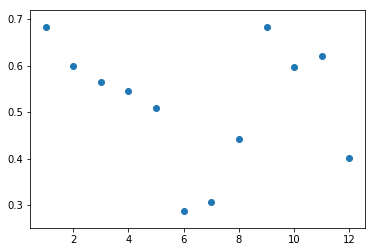

In [14]:
plt.scatter(df['Month of absence'].unique(),df['Monthly Utilization'].unique())

In [542]:
uts=[]
for i in range(1,13):
    monthly_utilization=df[df['Month of absence']==i].iloc[:,21].sum()/len(df[df['Month of absence']==i])
    uts.append(monthly_utilization)

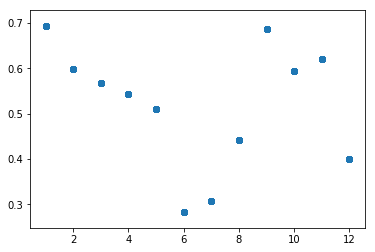

In [543]:
plt.scatter(df['Month of absence'],df['Monthly Utilization'])
# plt.plot(df['Month of absence'],df['Monthly Utilization'])

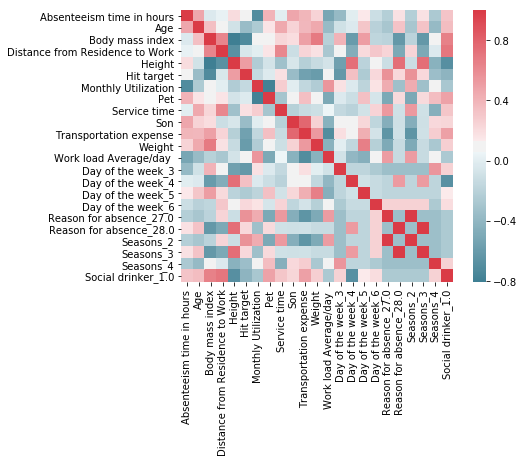

In [544]:
f, ax = plt.subplots(figsize=(7, 5))
corr = ts.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

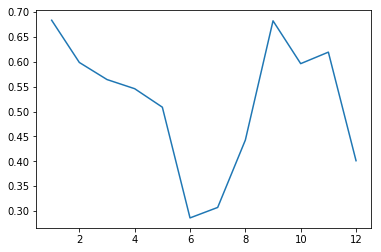

In [15]:
plt.plot(ts.index,ts['Monthly Utilization'])

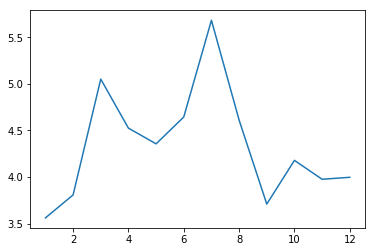

In [16]:
plt.plot(ts.index,ts['Absenteeism time in hours'])

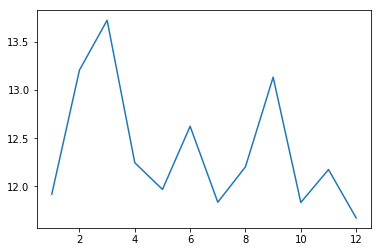

In [554]:
plt.plot(ts.index,ts['Service time'])

In [152]:
model_fit.y

array([[3.48258503e+00, 2.42000000e+01, 9.63738374e+01, 1.19200000e+01,
        1.82120000e+02, 3.15144253e+05],
       [3.80821917e+00, 3.61095890e+01, 9.71506849e+01, 1.32054795e+01,
        2.10520548e+02, 2.69977945e+05],
       [5.02334802e+00, 3.19000000e+01, 9.73333333e+01, 1.37222222e+01,
        2.16977778e+02, 2.68261822e+05],
       [4.55345301e+00, 2.70566038e+01, 9.46037736e+01, 1.22452830e+01,
        2.25547170e+02, 2.74851264e+05],
       [4.29164145e+00, 2.45312500e+01, 9.72500000e+01, 1.19687500e+01,
        2.24625000e+02, 2.42105274e+05],
       [4.72119345e+00, 2.83888889e+01, 9.50555556e+01, 1.26111111e+01,
        2.04833333e+02, 2.71010702e+05],
       [5.71567623e+00, 2.94328358e+01, 9.50298507e+01, 1.18358209e+01,
        2.31671642e+02, 2.49814418e+05],
       [4.54255423e+00, 3.16851852e+01, 9.29444444e+01, 1.22037037e+01,
        2.43000000e+02, 2.38005222e+05],
       [3.64674772e+00, 3.18490566e+01, 9.12075472e+01, 1.31320755e+01,
        2.25396226e+02, 

In [40]:
ts=ts.drop(columns=[
       'Day of the week_3', 'Day of the week_4', 'Day of the week_5',
       'Day of the week_6', 'Seasons_2', 'Seasons_3', 'Seasons_4',
       'Social drinker_1.0'],axis=1)

In [41]:
ts=ts.drop(columns=[
       'Day of the week_3', 'Day of the week_4', 'Day of the week_5',
       'Day of the week_6', 'Seasons_2', 'Seasons_3', 'Seasons_4',
       'Social drinker_1.0'],axis=1)

,Absenteeism time in hours,Age,Body mass index,Distance from Residence to Work,Height,Hit target,Monthly Utilization,Pet,Service time,Son,Transportation expense,Weight,Work load Average/day,Reason for absence_27.0,Reason for absence_28.0
Month of absence,,,,,,,,,,,,,,,
1.0,3.482585,34.960000,26.200000,24.200000,172.820000,96.373837,0.692281,0.440000,11.920000,0.700000,182.120000,78.480000,315144.252871,1,0
2.0,3.808219,35.315068,26.739726,36.109589,171.671233,97.150685,0.598641,0.698630,13.205479,0.602740,210.520548,78.520548,269977.945205,1,0
3.0,5.023348,37.522222,26.600000,31.900000,171.322222,97.333333,0.566754,0.666667,13.722222,1.177778,216.977778,77.944444,268261.822222,1,0
4.0,4.553453,36.641509,26.245283,27.056604,173.207547,94.603774,0.543702,0.754717,12.245283,1.245283,225.547170,78.792453,274851.264151,0,1
5.0,4.291641,36.328125,25.671875,24.531250,174.906250,97.250000,0.521183,0.687500,11.968750,1.078125,224.625000,78.609375,242105.274102,0,1
6.0,4.721193,37.907407,26.481481,28.388889,172.703704,95.055556,0.281054,1.000000,12.611111,0.592593,204.833333,79.240741,271010.701975,0,1
7.0,5.715676,36.223881,26.776119,29.432836,172.835821,95.029851,0.305834,0.776119,11.835821,1.223881,231.671642,80.179104,249814.417910,0,0
8.0,4.542554,37.407407,27.537037,31.685185,171.444445,92.944444,0.465955,0.944444,12.203704,1.185185,243.000000,81.055556,238005.222222,0,0
9.0,3.646748,37.283019,27.528302,31.849057,170.962264,91.207547,0.686861,0.471698,13.132075,1.018868,225.396226,80.264151,266165.605231,0,0


In [155]:
prediction

,Absenteeism time in hours,Distance from Residence to Work,Hit target,Service time,Transportation expense,Work load Average/day
0,4.543092,36.327497,95.131901,13.834657,216.703475,259588.796317
1,5.054416,28.951090,92.917695,12.639582,236.692554,266490.958065
2,4.221792,25.517478,93.532558,11.259675,237.395183,257370.102048
3,3.835172,30.796454,94.755736,12.466994,215.712937,261371.242719
4,4.560182,32.372108,94.029214,13.171053,220.031039,269620.527670
5,4.646330,28.489238,93.543600,12.141467,235.552433,263311.685959
6,4.097347,28.366403,94.302430,11.956768,227.322276,259121.540203
7,4.215105,31.077416,94.436150,12.743118,218.198903,265199.065919
8,4.583511,30.364063,93.857394,12.629302,227.051337,266123.556982
9,4.387557,28.665522,93.937076,12.104665,230.980374,261286.220728


In [158]:
prediction['Time Utilization']=(prediction['Service time'] - prediction['Absenteeism time in hours'])/prediction['Service time']
    

In [160]:
np.mean(prediction['Time Utilization'])

0.6479547380546568

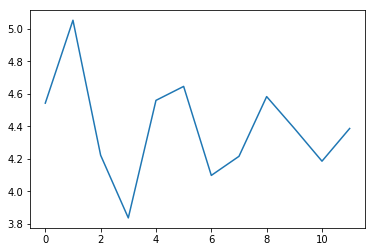

In [156]:
plt.plot(prediction.index,prediction.iloc[:,0])

In [109]:
op=pd.concat([ts,prediction],axis=0,sort=True,ignore_index=True)

In [547]:
np.mean(uts)

0.5206827998715174

In [406]:
vif=pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

C:\Users\ytnvj\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\ytnvj\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [408]:
vif[1:20]

Transportation expense             6.167108e+03
Distance from Residence to Work             inf
Service time                       2.889509e+05
Age                                4.767642e+02
Work load Average/day              1.831911e+00
Hit target                         2.464078e+00
Son                                9.007199e+15
Pet                                2.711256e+02
Weight                             1.125900e+15
Height                             3.142400e+01
Body mass index                    5.629500e+14
Absenteeism time in hours          1.927786e+00
ID_1                                        inf
ID_2                                        inf
ID_3                                        inf
ID_4                                        inf
ID_5                                        inf
ID_6                                        inf
ID_7                                        inf
dtype: float64

In [17]:
ts.describe()

,Absenteeism time in hours,Age,Body mass index,Distance from Residence to Work,Height,Hit target,Monthly Utilization,Pet,Service time,Son,...,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Reason for absence_27.0,Reason for absence_28.0,Seasons_2,Seasons_3,Seasons_4,Social drinker_1.0
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.341833,36.414492,26.678912,29.409137,172.147923,94.782941,0.519683,0.750537,12.377205,1.009729,...,0.250000,0.083333,0.083333,0.166667,0.250000,0.250000,0.250000,0.250000,0.250000,0.833333
std,0.608151,1.011240,0.532176,3.332972,1.178818,2.300934,0.134105,0.179430,0.655596,0.242400,...,0.452267,0.288675,0.288675,0.389249,0.452267,0.452267,0.452267,0.452267,0.452267,0.389249
min,3.561647,34.897959,25.671875,24.200000,170.885714,90.285714,0.286133,0.440000,11.673469,0.592593,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.934198,35.733529,26.422432,27.817722,171.313095,94.033730,0.432265,0.682292,11.898955,0.909694,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.267633,36.471205,26.669863,29.446577,171.700696,95.042703,0.555092,0.755930,12.189153,1.102555,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.619451,37.314116,26.855952,31.726153,172.823955,96.562274,0.603828,0.843254,12.769130,1.185317,...,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,0.250000,0.250000,1.000000
max,5.682193,37.907407,27.537037,36.109589,174.906250,97.333333,0.683515,1.000000,13.722222,1.245283,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


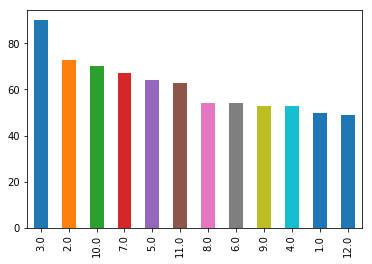

In [347]:
df['Month of absence'].value_counts().plot(kind='bar')

In [57]:
df.loc[df['Reason for absence']==20]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,1,20,3,5,3,235.0,11.0,14.0,37.0,244387.000000,...,1,3,1.0,0,0,1.0,88.0,172.0,29.0,5.500000
26,2,20,4,2,3,235.0,29.0,12.0,48.0,326452.000000,...,1,1,1.0,0,1,5.0,88.0,163.0,33.0,0.000000
28,2,20,6,2,3,235.0,29.0,12.0,48.0,275089.000000,...,1,1,1.0,0,1,5.0,88.0,163.0,33.0,0.000000
95,3,20,6,6,3,179.0,51.0,18.0,38.0,253957.000000,...,1,1,0.0,1,0,0.0,89.0,170.0,31.0,0.000000
142,4,20,0,3,1,118.0,14.0,13.0,40.0,271219.000000,...,0,1,1.0,1,0,8.0,98.0,170.0,34.0,0.000000
144,5,20,9,5,1,235.0,20.0,13.0,43.0,294217.000000,...,1,1,1.0,1,0,0.0,106.0,167.0,38.0,0.000000
146,5,20,9,5,4,235.0,20.0,13.0,43.0,294217.000000,...,1,1,1.0,1,0,0.0,106.0,167.0,38.0,0.000000
147,5,20,10,4,4,235.0,20.0,13.0,43.0,265017.000000,...,1,1,1.0,1,0,0.0,106.0,167.0,38.0,0.000000
148,5,20,10,6,4,235.0,20.0,13.0,43.0,265017.000000,...,1,1,1.0,1,0,0.0,106.0,167.0,38.0,0.000000
158,5,20,11,5,4,235.0,20.0,13.0,43.0,268519.000000,...,1,1,1.0,1,0,0.0,106.0,167.0,38.0,5.777778


In [1]:
%matplotlib inline

In [551]:
from sklearn.model_selection import train_test_split
X=ts.iloc[:,1:].values
y=ts.iloc[:,1].values

In [552]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [466]:
from sklearn.neighbors import KNeighborsRegressor

In [469]:
# Compute the KNN model for 1,3,5,10 & 15 neighbors
accuracy=[]
neighbors=[1,3,5,10,15]
for i in neighbors:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy.append(knn.score(X_test, y_test))
    print('Accuracy test score: {:.3f}'
        .format(knn.score(X_test, y_test)))

Accuracy test score: -0.507
Accuracy test score: -0.235
Accuracy test score: -0.186
Accuracy test score: -0.009
Accuracy test score: 0.032


In [202]:
for i in cat_cols:
    print(stat._counts(df_n.loc[:,i])[0])

(1.0, 23)
(22.0, 4)
(8.0, 4)
(2.0, 6)
(1.0, 7)
(0.0, 22)
(3.0, 23)
(0.0, 23)
(0.0, 23)


In [206]:
df_n[df_n[cat_cols[1]]==22]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
14,1.0,22.0,3.0,2.0,2.0,235.0,11.0,14.0,37.0,244387.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
20,1.0,22.0,4.0,6.0,3.0,235.0,11.0,14.0,37.0,246288.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
21,1.0,22.0,5.0,2.0,3.0,235.0,11.0,14.0,37.0,237656.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [53]:
df.describe(include='all')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.0,737.0,739.0,740.0,740.0,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.0,730.0,734.000000,737.0,736.0,738.000000,739.000000,726.000000,709.000000,718.000000
unique,36.0,28.0,13.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
top,3.0,23.0,3.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
freq,113.0,149.0,87.0,161.0,195.0,NaN,NaN,NaN,NaN,NaN,...,695.0,601.0,NaN,418.0,682.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,221.035471,29.667571,12.565807,36.449118,271188.860274,...,NaN,NaN,1.017711,NaN,NaN,0.746612,79.063599,172.152893,26.684062,6.977716
std,NaN,NaN,NaN,NaN,NaN,66.954179,14.848124,4.389813,6.480148,38981.880873,...,NaN,NaN,1.094928,NaN,NaN,1.319726,12.868630,6.081065,4.292819,13.476962
min,NaN,NaN,NaN,NaN,NaN,118.000000,5.000000,1.000000,27.000000,205917.000000,...,NaN,NaN,0.000000,NaN,NaN,0.000000,56.000000,163.000000,19.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,179.000000,16.000000,9.000000,31.000000,244387.000000,...,NaN,NaN,0.000000,NaN,NaN,0.000000,69.000000,169.000000,24.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,225.000000,26.000000,13.000000,37.000000,264249.000000,...,NaN,NaN,1.000000,NaN,NaN,0.000000,83.000000,170.000000,25.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,260.000000,50.000000,16.000000,40.000000,284853.000000,...,NaN,NaN,2.000000,NaN,NaN,1.000000,89.000000,172.000000,31.000000,8.000000


In [115]:
def outlier_imputer(df_o,num_cols):
    # Outlier Analysis
    while True:
        for i in num_cols:
            median=np.median(df_o[i])
            std=np.std(df_o[i])
            min=(df_o[i].quantile(0.25)-1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))    
            max=(df_o[i].quantile(0.75)+1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))
            df_o.loc[df_o[i]<min,i] = np.nan
            df_o.loc[df_o[i]>max,i] = np.nan
        missing_val = df_o.isnull().sum()
        print(missing_val)
        if(missing_val.sum()>0):
            df_o[num_cols]=pd.DataFrame(fancyimpute.KNN(k = 3).complete(df_o[num_cols]), columns = num_cols)
        else:
            break
    return df_o

ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               3
Distance from Residence to Work      0
Service time                         5
Age                                  8
Work load Average/day               31
Hit target                          19
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                 46
Weight                               0
Height                             119
Body mass index                      0
Absenteeism time in hours           45
dtype: int64
Imputing row 1/740 with 0 missing, elapsed time: 0.072
Imputing row 101/740 with 1 missing, elapsed time: 0.075
Imputing row 201/740 with 1 missing, elapsed time: 0.077

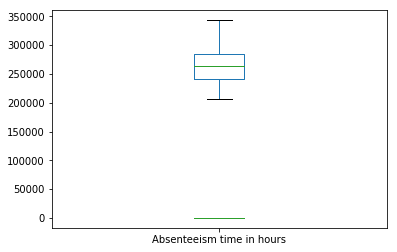

In [119]:
for i in num_cols:
    df[i].plot.box()

In [37]:
np.mean(df[df.ID==20]['Work load Average/day '])

266246.85365853657

In [65]:
import statistics as stat
stat.mode(df['Day of the week'])

2

In [112]:
missing_val = df.isnull().sum()

In [113]:
missing_val

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [137]:
import datetime

x = datetime.datetime.now()
x

datetime.datetime(2018, 11, 13, 12, 8, 5, 920180)

In [135]:
x.isoformat()

'2018-11-13T06:34:45.990075'

In [138]:
x=datetime.datetime.utcnow()

In [159]:
print(x.strftime('%Y-%m-%dT%H:%M:%S')+datetime.datetime.now(tz.tzlocal()).strftime('%z'))

2018-11-13T06:38:13+0530


In [145]:
datetime.datetime.now().strftime('%Y-%m-%dT%H:%M:%S%Z')

'2018-11-13T12:10:31'

In [146]:
tzlocal()

NameError: name 'tzlocal' is not defined

In [148]:
import dateutil.tz as tz

In [158]:
datetime.datetime.now(tz.tzlocal())

datetime.datetime(2018, 11, 13, 12, 17, 33, 401287, tzinfo=tzlocal())

In [161]:
df.iloc[:,0:7].head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work
0,11,26,7,3,1,289.0,36.0
1,36,0,7,3,1,118.0,13.0
2,3,23,7,4,1,179.0,51.0
3,7,7,7,5,1,279.0,5.0
4,11,23,7,5,1,289.0,36.0


In [485]:
df_1=df[df.ID==1].reset_index(drop=True)

In [486]:
df_1['Time Utilized']=df['Service time'] - df['Absenteeism time in hours']

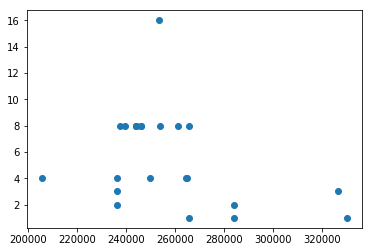

In [489]:
plt.scatter(df_1['Work load Average/day '],df_1['Absenteeism time in hours'])

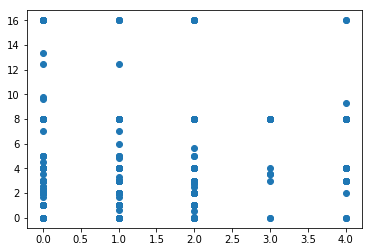

In [491]:
plt.scatter(df['Son'],df['Absenteeism time in hours'])

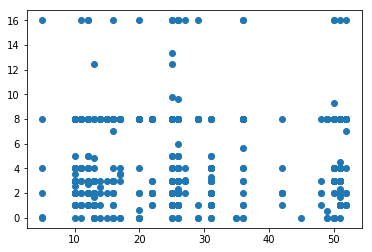

In [494]:
plt.scatter(df['Distance from Residence to Work'],df['Absenteeism time in hours'])

In [496]:
df=pd.read_excel('Absenteeism_at_work_Project.xls')

In [501]:
df[df.ID==1 and df['Month of absence']==1]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [523]:
df[(df.ID==1 )& (df['Month of absence']==5)]
# df.query("ID==1 & 'Month of absence'==12")

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
439,1,1.0,5.0,2,3,235.0,11.0,14.0,37.0,246074.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
674,1,22.0,5.0,2,3,235.0,11.0,14.0,37.0,237656.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [495]:
df['Absenteeism time in hours'].value_counts()

8.000000     201
2.000000     156
3.000000     111
1.000000      88
4.000000      61
0.000000      36
16.000000     20
5.000000       7
2.953488       2
2.333333       2
3.530809       2
5.040241       1
8.000000       1
3.000010       1
3.026543       1
4.001604       1
9.333333       1
1.000003       1
5.999995       1
12.444444      1
9.666667       1
4.000000       1
2.000000       1
3.000007       1
0.000002       1
2.737374       1
4.000000       1
8.000000       1
13.333333      1
3.524263       1
            ... 
4.000000       1
0.666667       1
9.777778       1
8.000000       1
12.499948      1
7.976102       1
7.999996       1
4.000000       1
2.004656       1
7.999901       1
1.666667       1
7.999999       1
5.000010       1
2.559880       1
5.666667       1
8.000000       1
7.000446       1
0.571214       1
3.000029       1
5.000000       1
2.500000       1
0.001068       1
3.547624       1
4.833316       1
1.000004       1
2.000000       1
1.666667       1
0.029244      

In [484]:
df_1=df.copy()
df_1['Time Utilized']=df['Service time'] - df['Absenteeism time in hours']

df_1['Time Utilized'].sum()/df_1['Service time'].sum()
# 60% Utilized

0.649984526419415

In [481]:
df['Time Utilized'].sum()/df['Service time'].sum()
# 60% Utilized

192.99999999998454